In [1]:
import sys
sys.path.append('..')
from chemagent import *
from chemagent.agents.chem_agent import ChemAgent


In [5]:
import sys
print(sys.version)
print(sys.executable)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
F:\Anaconda\python.exe


In [2]:
model = ChemAgent(model='gpt-4-0613',analysis_model = 'gpt-4-0613', max_iterations=10)

In [8]:
model.run('What is the SMILES of water?')



> Entering new FewShotAgentExecutor chain...
DEBUG:openai:message='Request to OpenAI API' method=post path=https://api.openai.com/v1/chat/completions
DEBUG:openai:api_version=None data='{"messages": [{"role": "user", "content": "Answer the following questions as best you can. You have access to the following tools:\\n\\nName2SMILES: Input a molecule name, returns SMILES.\\nMol2CAS: Input molecule (name or SMILES), returns CAS number.\\nQueryUSPTOWithType: Input reactants SMILES and possible reaction type, returns a file of similar reaction with reactants_smiles and products_smiles. You need to find the pattern of the chemical reaction from these similar reactionsfor final prediction of products. You would better get the final prediction after using this tool.\\nSMILES2Weight: Input SMILES, returns molecular weight.\\nFunctionalGroups: Input SMILES, return list of functional groups in the molecule.\\n\\nUse the following format:\\n\\nQuestion: the input question you must answer\\nThou

('The SMILES of water is O.',
 'Thought: I need to convert the name of the molecule to its SMILES representation.\nAction: Name2SMILES\nAction Input: Water\nObservation: O\nFinal Answer: The SMILES of water is O.')

In [3]:
# Demo1: 8.2 05:00 
model.run('Now You are given reactants and reagents SMILES CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+], \
                     predict the possible product SMILES.')



> Entering new FewShotAgentExecutor chain...
DEBUG:openai:message='Request to OpenAI API' method=post path=https://api.openai.com/v1/chat/completions
DEBUG:openai:api_version=None data='{"messages": [{"role": "user", "content": "Answer the following questions as best you can. You have access to the following tools:\\n\\nName2SMILES: Input a molecule name, returns SMILES.\\nMol2CAS: Input molecule (name or SMILES), returns CAS number.\\nQueryUSPTOWithType: Input SMILES of reactants and possible reaction type, returns a file of similar reaction with reactants_smiles and products_smiles. You need to find the pattern of the chemical reaction from these similar reactionsfor final prediction of products.         An example of input of this tool is \\"C1=CC=C(C=C1)C2=CC=CC=C2, heteroatom alkylation and arylation\\". \\nSMILES2Weight: Input SMILES, returns molecular weight.\\nFunctionalGroups: Input SMILES, return list of functional groups in the molecule. Analysis the observation of the fun

('The possible product SMILES is CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.OP(=O)([O-])Oc1ccccc1.[K+].[K+]',
 "Thought: I need to find the pattern of the chemical reaction to predict the product. I can use the QueryUSPTOWithType tool to find similar reactions and their products.\nAction: QueryUSPTOWithType\nAction Input: CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+]\nObservation: Invalid input, please input SMILES (multiple molecule SMILES are separated by .) and reaction type (SMILES and reaction type are separated by ,)\nThought: I need to specify a reaction type along with the reactants SMILES for the QueryUSPTOWithType tool. However, I don't know the reaction type yet. I can use the FunctionalGroups tool to analyze the functional groups in the molecules and predict the reaction type.\nAction: FunctionalGroups\nAction Input: CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+]\nObservation: 

In [3]:
# Demo2: 8.2 06:00 -> 让USPTO QUERY能够返回相似的答案了。out of distribution problem
# It said no reaction!!
model.run('Now You are given reactants and reagents SMILES CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+], \
                     predict the possible product SMILES.')



> Entering new FewShotAgentExecutor chain...
DEBUG:openai:message='Request to OpenAI API' method=post path=https://api.openai.com/v1/chat/completions
DEBUG:openai:api_version=None data='{"messages": [{"role": "user", "content": "Answer the following questions as best you can. You have access to the following tools:\\n\\nName2SMILES: Input a molecule name, returns SMILES.\\nMol2CAS: Input molecule (name or SMILES), returns CAS number.\\nQueryUSPTOWithType: Input SMILES of reactants and possible reaction type, returns a file of similar reaction with reactants_smiles and products_smiles. You need to find the pattern of the chemical reaction from these similar reactionsfor final prediction of products.         An example of input of this tool is \\"C1=CC=C(C=C1)C2=CC=CC=C2, heteroatom alkylation and arylation\\". \\nSMILES2Weight: Input SMILES, returns molecular weight.\\nFunctionalGroups: Input SMILES, return list of functional groups in the molecule. Analysis the observation of the fun

h:\AutoChemAgent\ChemAgent\tests\..\chemagent\tools\databases.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['reactants_smiles_embedding'] = dataframe['reactants_smiles_embedding'].apply(lambda x: ast.literal_eval(x.replace('"','')))


--------------------
Index([4299, 2910, 38855, 35830, 39087], dtype='int64')
--------------------


Observation: valid input******reactants and reagents:Cc1[nH]c(C(=O)O)cc1Br.NC(=O)c1cc(Cl)nc(N2CCC(O)CC2)c1
products:Cc1[nH]c(C(=O)OC2CCN(c3cc(C(N)=O)cc(Cl)n3)CC2)cc1Br

reactants and reagents:CC(C)(C)OC(=O)CCN.Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(CCN3CCC(C(=O)O)CC3)c2cc1Cl
products:Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(CCN3CCC(C(=O)O)CC3)c2cc1NCCC(=O)OC(C)(C)C

reactants and reagents:Cc1cc(=O)[nH]c2nc(OCCCC=O)ccc12.Clc1cccc(N2CCNCC2)c1Cl
products:Cc1cc(=O)[nH]c2nc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)ccc12

reactants and reagents:CN1Cc2c(C3CCC(O)CC3)ccc(N)c2C1=O.O=P1(Cc2ccc(Nc3ncc(C(F)(F)F)c(Cl)n3)cc2)OCCCO1
products:CN1Cc2c(c(Nc3nc(Nc4ccc(CP5(=O)OCCCO5)cc4)ncc3C(F)(F)F)ccc2[C@H]2CC[C@H](O)CC2)C1=O

reactants and reagents:NC1CC1.O=Cc1cccc(C2c3n[nH]c(=O)c4cccc(c34)NC2c2ccccc2)c1
products:O=c1[nH]nc2c3c(cccc13)NC(c1ccccc1)C2c1cccc(CNC2CC2)c1


DEBUG:openai:message='Request to OpenAI API' method=post path=https://

h:\AutoChemAgent\ChemAgent\tests\..\chemagent\tools\databases.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['distance'] = dataframe['reactants_smiles_embedding'].apply(lambda x: euclidean_distance(np.array(x), np.array(target_vector)))


DEBUG:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=9 request_id=e7433d06034de090d0c6835e63f78218 response_code=200
Product: CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+]
Analysis of the pattern of the chemical reaction: This reaction does not seem to proceed as there is no reactive group in the reactants that can react with each other. The reactants include a sulfonamide, an aromatic iodide, and a potassium phosphate salt. The sulfonamide and the aromatic iodide do not have any functional groups that can react with each other, and the potassium phosphate is a salt that is typically used as a base or a buffer in reactions, but in this case, there are no acidic protons to deprotonate or good leaving groups for it to react with. Therefore, the reactants remain unchanged.DEBUG:openai:message='Request to OpenAI API' method=post path=https://api.openai.com/v1/chat/completions
DEBUG:openai:api

('The reaction does not proceed, the reactants remain unchanged: CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+]',
 'Thought: I need to find a similar reaction pattern to predict the product of this reaction.\nAction: QueryUSPTOWithType\nAction Input: CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+], heteroatom alkylation and arylation\nObservation: Product: CC(C)(C(=O)Nc1nncs1)C(c1ccccc1)c1ccc2[nH]ncc2c1.Ic1ccccc1.O=P([O-])([O-])[O-].[K+].[K+].[K+]\nAnalysis of the pattern of the chemical reaction: This reaction does not seem to proceed as there is no reactive group in the reactants that can react with each other. The reactants include a sulfonamide, an aromatic iodide, and a potassium phosphate salt. The sulfonamide and the aromatic iodide do not have any functional groups that can react with each other, and the potassium phosphate is a salt that is typically used as a base or a buffer in reactio

In [5]:
# Demo 8.2 06:07 -> in distribution prediction
model.run('Now You are given reactants and reagents SMILES CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl, \
                     predict the possible product SMILES.')
# O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1



> Entering new FewShotAgentExecutor chain...
DEBUG:openai:message='Request to OpenAI API' method=post path=https://api.openai.com/v1/chat/completions
DEBUG:openai:api_version=None data='{"messages": [{"role": "user", "content": "Answer the following questions as best you can. You have access to the following tools:\\n\\nName2SMILES: Input a molecule name, returns SMILES.\\nMol2CAS: Input molecule (name or SMILES), returns CAS number.\\nQueryUSPTOWithType: Input SMILES of reactants and possible reaction type, returns a file of similar reaction with reactants_smiles and products_smiles. You need to find the pattern of the chemical reaction from these similar reactionsfor final prediction of products.         An example of input of this tool is \\"C1=CC=C(C=C1)C2=CC=CC=C2, heteroatom alkylation and arylation\\". \\nSMILES2Weight: Input SMILES, returns molecular weight.\\nFunctionalGroups: Input SMILES, return list of functional groups in the molecule. Analysis the observation of the fun

h:\AutoChemAgent\ChemAgent\tests\..\chemagent\tools\databases.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['reactants_smiles_embedding'] = dataframe['reactants_smiles_embedding'].apply(lambda x: ast.literal_eval(x.replace('"','')))


--------------------
Index([0, 24043, 17821, 10520, 33337], dtype='int64')
--------------------


Observation: valid input******reactants and reagents:CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl
products:O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1

reactants and reagents:CS(=O)(=O)OCC1CCCN(C(=O)C2(c3ccc(Cl)cc3)CCC2)C1.Fc1ccccc1N1CCNCC1
products:O=C(N1CCCC(CN2CCN(c3ccccc3F)CC2)C1)C1(c2ccc(Cl)cc2)CCC1

reactants and reagents:CS(=O)(=O)OCCCCc1ccc(OCCCN2CCCCCC2)cc1.O=c1c2ccccc2c(Cl)nn1C[C@H]1CCCN1
products:O=c1c2ccccc2c(Cl)nn1C[C@H]1CCCN1CCCCc1ccc(OCCCN2CCCCCC2)cc1

reactants and reagents:CS(=O)(=O)OCCCC1(O)CC1.NC(=O)C1(C(=O)N(c2ccccc2)c2ccc(Oc3ccnc4cc(O)ccc34)c(F)c2)CC1
products:NC(=O)C1(C(=O)N(c2ccccc2)c2ccc(Oc3ccnc4cc(OCCCC5(O)CC5)ccc34)c(F)c2)CC1

reactants and reagents:CS(=O)(=O)OCCCN1C(=O)C2CCCCC2C1=O.Fc1ccc(-c2nc(C3CCNCC3)n3ccccc23)cc1
products:O=C1C2CCCCC2C(=O)N1CCCN1CCC(c2nc(-c3ccc(F)cc3)c3ccccn23)CC1


DEBUG:openai:mes

h:\AutoChemAgent\ChemAgent\tests\..\chemagent\tools\databases.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['distance'] = dataframe['reactants_smiles_embedding'].apply(lambda x: euclidean_distance(np.array(x), np.array(target_vector)))


DEBUG:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7 request_id=c55da22315cd8d6095bc273ccbfca4ff response_code=200
O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1

This reaction involves the nucleophilic substitution of the mesylate group (CS(=O)(=O)O-) by the nitrogen atom of the piperazine ring. The mesylate group is a good leaving group, which makes this substitution possible. The stereochemistry at the chiral carbon remains unchanged.

Reactants and reagents: CS(=O)(=O)OCC1CCCN(C(=O)C2(c3ccc(Cl)cc3)CCC2)C1.Fc1ccccc1N1CCNCC1
Product:
O=C(N1CCCC(CN2CCN(c3ccccc3F)CC2)C1)C1(c2ccc(Cl)cc2)CCC1

This reaction involves the nucleophilic substitution of the mesylate group (CS(=O)(=O)O-) by the nitrogen atom of the piperazine ring. The mesylate group is a good leaving group, which makes this substitution possible.

Reactants and reagents: CS(=O)(=O)OCCCC1(O)CC1.NC(=O)C1(C(=O)N(c2ccccc2)c2ccc(Oc3ccnc4cc(O)ccc34)c(F)c2)

('The possible product SMILES is O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1.',
 'Thought: I need to find a pattern of the chemical reaction from similar reactions to predict the product.\nAction: QueryUSPTOWithType\nAction Input: CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl, heteroatom alkylation and arylation\nObservation: O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1\n\nThis reaction involves the nucleophilic substitution of the mesylate group (CS(=O)(=O)O-) by the nitrogen atom of the piperazine ring. The mesylate group is a good leaving group, which makes this substitution possible. The stereochemistry at the chiral carbon remains unchanged.\n\nReactants and reagents: CS(=O)(=O)OCC1CCCN(C(=O)C2(c3ccc(Cl)cc3)CCC2)C1.Fc1ccccc1N1CCNCC1\nProduct:\nO=C(N1CCCC(CN2CCN(c3ccccc3F)CC2)C1)C1(c2ccc(Cl)cc2)CCC1\n\nThis reaction involves the nucleophilic substitution of the mesylate group (CS(=O)(=O)O-) by the 

### Visual Aids

2023.03.2


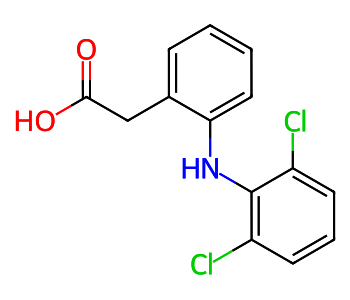

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor

rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)


diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

d2d = rdMolDraw2D.MolDraw2DSVG(350, 300)
d2d.DrawMolecule(diclofenac)

d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

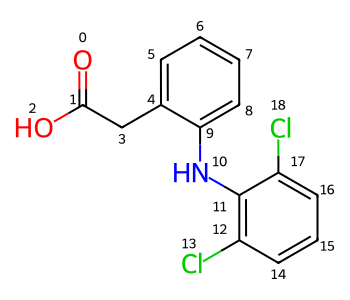

In [2]:
# 带有原子索引的
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True # add this line
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [14]:
#获取分子中的原子数目
atom_num = cp.GetNumAtoms()
#获取分子中的键数目
bond_num = cp.GetNumBonds()

nei_bond = []

#获取分子中键的相关类型以及键的特征，以及成键原子序号
for i in range(bond_num):
  nei_bond.append((cp.GetBondWithIdx(i).GetBondType().name,cp.GetBondWithIdx(i).GetBeginAtomIdx(),cp.GetBondWithIdx(i).GetEndAtomIdx()))

In [15]:
nei_bond

[('DOUBLE', 0, 1),
 ('SINGLE', 1, 2),
 ('SINGLE', 1, 3),
 ('SINGLE', 3, 4),
 ('AROMATIC', 4, 5),
 ('AROMATIC', 5, 6),
 ('AROMATIC', 6, 7),
 ('AROMATIC', 7, 8),
 ('AROMATIC', 8, 9),
 ('SINGLE', 9, 10),
 ('SINGLE', 10, 11),
 ('AROMATIC', 11, 12),
 ('SINGLE', 12, 13),
 ('AROMATIC', 12, 14),
 ('AROMATIC', 14, 15),
 ('AROMATIC', 15, 16),
 ('AROMATIC', 16, 17),
 ('SINGLE', 17, 18),
 ('AROMATIC', 9, 4),
 ('AROMATIC', 17, 11)]

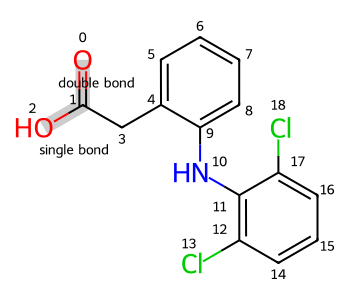

In [13]:
# 带有键注释的
cp = Chem.Mol(diclofenac)
cp.GetBondWithIdx(0).SetProp("bondNote","double bond") # this line
cp.GetBondWithIdx(1).SetProp("bondNote","single bond") # this line
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.drawOptions().setHighlightColour((0.8,0.8,0.8))
d2d.DrawMolecule(cp,highlightAtoms=[],highlightBonds=[0,1])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())